Data Load into dataframe

In [49]:
import pandas as pd
df = pd.read_csv('data/Data_Train.csv')
df.head()

,ID,Asst_Reg,GGGrade,Experience,Validation,Yearly_Income,Home_Status,Unpaid_2_years,Already_Defaulted,Designation,...,File_Status,State,Account_Open,Total_Unpaid_CL,Duration,Unpaid_Amount,Reason,Claim_Type,Due_Fee,Default
0,95074,421802,II,>10yrs,Vfied,633600.00,MORTGAGE,0,0,GLENDALE NISSAN,...,fully paid,California,17,58598.0,3 years,31216.05,debt consolidation,I,0.0,0
1,134131,3964312,IV,7yrs,Source Verified,85483.20,RENT,0,0,Business Teacher,...,whole,NC,15,18924.0,5 years,11660.49,debt consolidation,I,0.0,0
2,92602,4247560,III,<1yr,Source Verified,79200.00,RENT,0,0,driver,...,whole,Florida,7,15604.0,5 years,5637.87,major purchase,I,0.0,0
3,22591,197179,III,<1yr,Vfied,61600.00,RENT,0,0,AvePoint,...,fully paid,NewJersey,9,22410.0,3 years,15607.17,major purchase,I,0.0,1
4,125060,4646684,V,2yrs,Source Verified,68053.92,RENT,0,0,Lead Tester,...,fully paid,LA,10,36022.0,5 years,27472.86,debt consolidation,I,0.0,0


In [50]:
# encode GGGrade from roman numerals to integers and drop the original column
df['GGGrade'] = df['GGGrade'].map({'I':1, 'II':2, 'III':3, 'IV':4, 'V':5})
# set designation to lowercase
df['Designation'] = df['Designation'].str.lower()

df.head()


,ID,Asst_Reg,GGGrade,Experience,Validation,Yearly_Income,Home_Status,Unpaid_2_years,Already_Defaulted,Designation,...,File_Status,State,Account_Open,Total_Unpaid_CL,Duration,Unpaid_Amount,Reason,Claim_Type,Due_Fee,Default
0,95074,421802,2.0,>10yrs,Vfied,633600.00,MORTGAGE,0,0,glendale nissan,...,fully paid,California,17,58598.0,3 years,31216.05,debt consolidation,I,0.0,0
1,134131,3964312,4.0,7yrs,Source Verified,85483.20,RENT,0,0,business teacher,...,whole,NC,15,18924.0,5 years,11660.49,debt consolidation,I,0.0,0
2,92602,4247560,3.0,<1yr,Source Verified,79200.00,RENT,0,0,driver,...,whole,Florida,7,15604.0,5 years,5637.87,major purchase,I,0.0,0
3,22591,197179,3.0,<1yr,Vfied,61600.00,RENT,0,0,avepoint,...,fully paid,NewJersey,9,22410.0,3 years,15607.17,major purchase,I,0.0,1
4,125060,4646684,5.0,2yrs,Source Verified,68053.92,RENT,0,0,lead tester,...,fully paid,LA,10,36022.0,5 years,27472.86,debt consolidation,I,0.0,0


In [51]:
# print unique values for each column
for col in df.columns:
    print(col, df[col].unique())

ID [ 95074 134131  92602 ... 102153 115343 104968]
Asst_Reg [ 421802 3964312 4247560 ... 2624710 5966919 6637289]
GGGrade [ 2.  4.  3.  5. nan  1.]
Experience ['>10yrs' '7yrs' '<1yr' '2yrs' '1yrs' '4yrs' '9yrs' '6yrs' '5yrs' '8yrs'
 '3yrs']
Validation ['Vfied' 'Source Verified' 'Not Vfied']
Yearly_Income [633600.    85483.2   79200.   ... 510398.24 154191.84  90423.52]
Home_Status ['MORTGAGE' 'RENT' 'OWN' 'OTHER' 'NONE']
Unpaid_2_years [ 0  4  2  1  3 11  5  6  7  9 12  8 10 18 16 15 13 14]
Already_Defaulted [0 1 2 6 5 4 3]
Designation ['glendale nissan' 'business teacher' 'driver' ... 'engineer support ii'
 'interface coordinator' 'parts clerk']
Debt_to_Income [12.5496  9.0048 24.9144 ... 65.7216  0.4032 63.6888]
Postal_Code [91300. 27400. 32800.  7000. 70800. 77000. 92100.  6000. 92500. 78500.
 95900. 49400. 97200. 72200. 11900. 91900. 59100. 28300. 80800. 72900.
 45000. 27500. 87100. 55000. 30300.    nan 11700. 75200. 20800. 32500.
 35400. 28000. 29700. 17700. 95800. 85700. 84400. 1

In [52]:
# print the average yearly income of people who are in default
print(df[df['Default'] == 1]['Yearly_Income'].mean())

134271.61678584345


In [53]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

# One-hot encoding for low cardinality categorical variables
one_hot_columns = ['Home_Status', 'File_Status', 'Claim_Type', 'Validation', 'Duration']
df_encoded = pd.get_dummies(df, columns=one_hot_columns)

# Label encoding for high cardinality or ordinal categorical variables
label_columns = ['Asst_Reg', 'Designation', 'State', 'Reason', 'Sub_GGGrade']
label_encoder = LabelEncoder()

for col in label_columns:
    df_encoded[col + '_encoded'] = label_encoder.fit_transform(df_encoded[col].astype(str))
    
# Drop original categorical columns after encoding
df_encoded = df_encoded.drop(columns=label_columns)

# Preprocess the Experience column
def preprocess_experience(exp):
    if pd.isna(exp):
        return np.nan
    elif 'yrs' in exp:
        return float(exp.replace('yrs', '').replace('>', '').strip())
    elif '<1yr' in exp:
        return 0.5
    else:
        return np.nan

# Apply preprocessing to the Experience column
df_encoded['Experience'] = df_encoded['Experience'].apply(preprocess_experience)

# Handle any remaining NaN values (you might want to impute or drop them based on your preference)
df_encoded = df_encoded.dropna()

# Separate features and target
X = df_encoded.drop('Default', axis=1)
X = X.drop('ID', axis=1)
y = df_encoded['Default']
df_encoded

,ID,GGGrade,Experience,Yearly_Income,Unpaid_2_years,Already_Defaulted,Debt_to_Income,Postal_Code,Lend_Amount,Deprecatory_Records,...,Validation_Not Vfied,Validation_Source Verified,Validation_Vfied,Duration_3 years,Duration_5 years,Asst_Reg_encoded,Designation_encoded,State_encoded,Reason_encoded,Sub_GGGrade_encoded
0,95074,2.0,10.0,633600.00,0,0,12.5496,91300.0,42023.25,0,...,False,False,True,True,False,33710,13599,6,3,8
1,134131,4.0,7.0,85483.20,0,0,9.0048,27400.0,38133.00,0,...,False,True,False,False,True,30447,4323,25,3,19
2,92602,3.0,0.5,79200.00,0,0,24.9144,32800.0,17100.00,0,...,False,True,False,False,True,34476,10350,9,6,14
3,22591,3.0,0.5,61600.00,0,0,16.5816,7000.0,5130.00,0,...,False,False,True,True,False,13893,2927,31,6,11
4,125060,5.0,2.0,68053.92,0,0,40.0512,70800.0,19665.00,0,...,False,True,False,False,True,40170,17473,16,3,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87494,23253,3.0,0.5,246400.00,0,0,9.9960,12000.0,20520.00,0,...,False,True,False,True,False,49275,32227,32,10,11
87495,120884,2.0,10.0,75680.00,0,0,19.3200,48000.0,10260.00,0,...,True,False,False,True,False,38732,11111,19,3,6
87496,33259,4.0,3.0,90423.52,0,0,48.8208,1400.0,27360.00,0,...,False,True,False,False,True,19439,8623,17,3,17
87497,102153,2.0,10.0,91520.00,0,0,7.7952,6400.0,8550.00,3,...,False,True,False,True,False,56399,15802,5,3,5


In [54]:
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV, train_test_split
import seaborn as sns

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define classifiers and their parameter grids
classifiers = {
    'Logistic Regression': (LogisticRegression(), {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2']
    }),
    'Decision Tree': (DecisionTreeClassifier(), {
        'max_depth': [3, 5, 10, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }),
    'Random Forest': (RandomForestClassifier(), {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 10, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }),
    # 'SVM': (SVC(), {
    #     'C': [0.1, 1, 10],
    #     'kernel': ['linear'],
    #     'gamma': ['scale', 'auto']
    # })
}


In [55]:
# Function to plot confusion matrix
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(10,7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
# Function to plot feature importance
def plot_feature_importance(importances, title):
    feat_importances = pd.Series(importances, index=X.columns)
    plt.figure(figsize=(10, 6))
    feat_importances.nlargest(10).plot(kind='barh')
    plt.title(title)
    plt.xlabel('Feature Importance Score')
    plt.tight_layout()
    plt.show()


/Users/george.li/Documents/code/homework/loan-default-analysis/venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/george.li/Documents/code/homework/loan-default-analysis/venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/george.li/Documents/code/homework/loan-default-analysis/venv/lib/python3.12/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
       

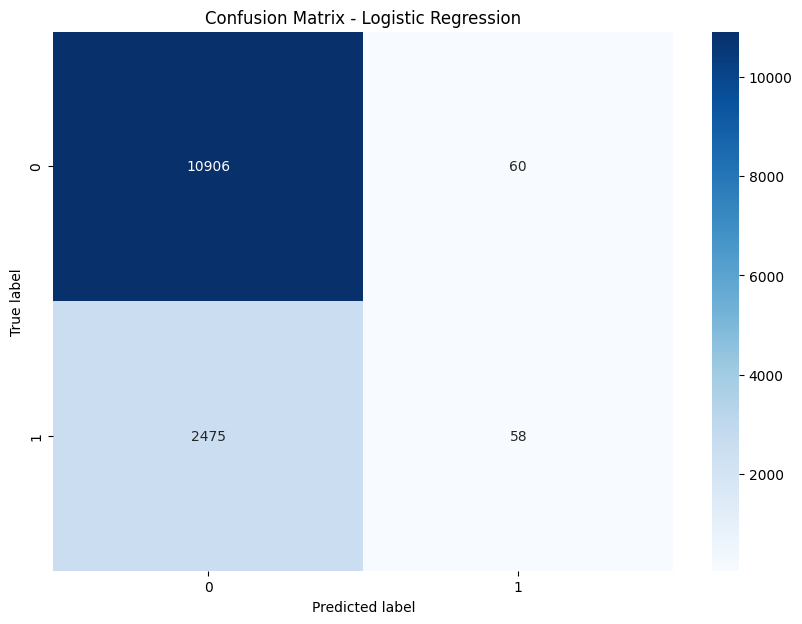

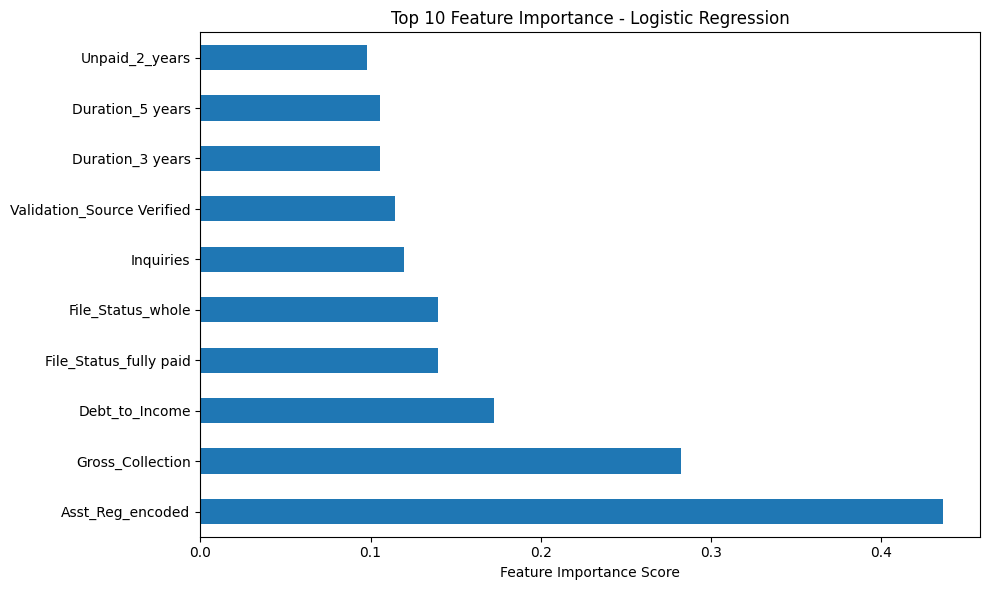

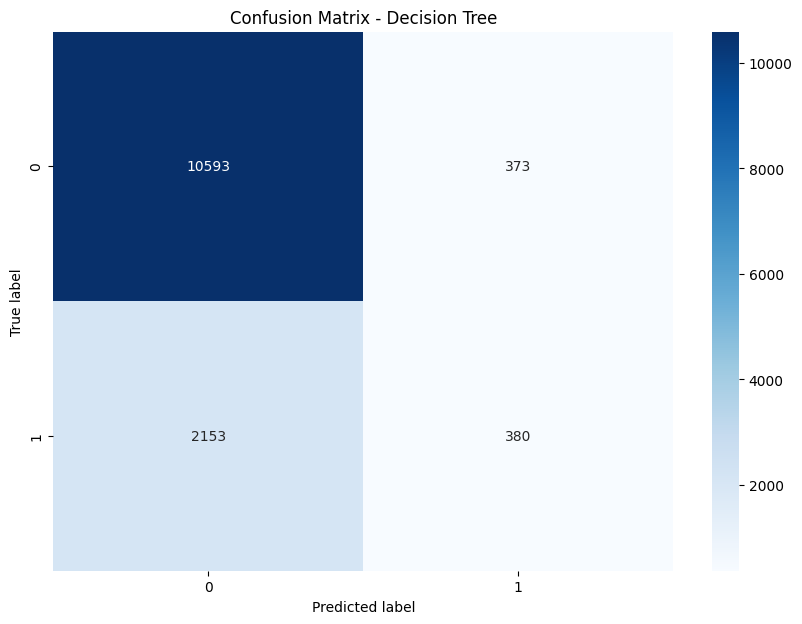

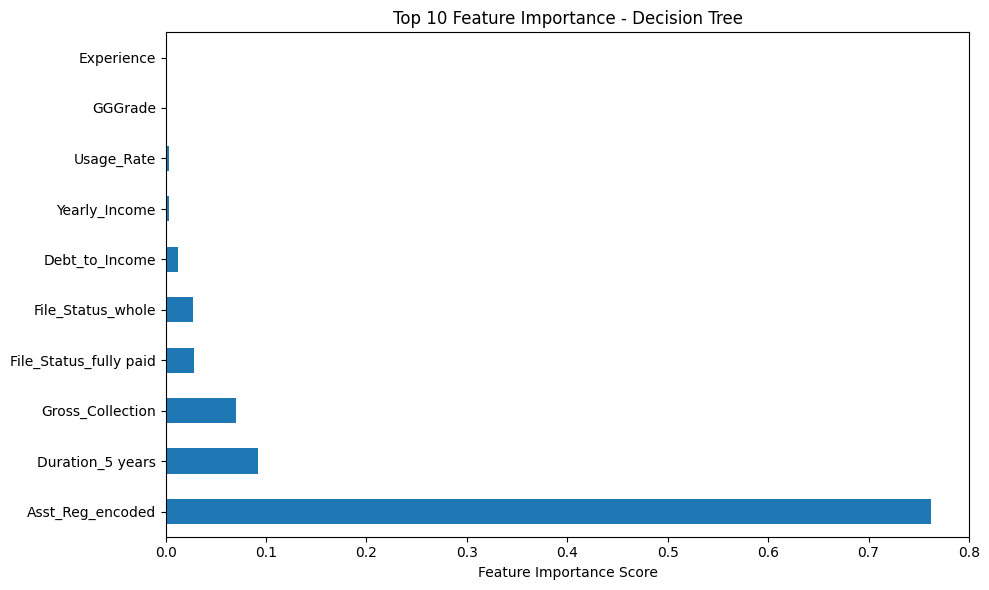

/Users/george.li/Documents/code/homework/loan-default-analysis/venv/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


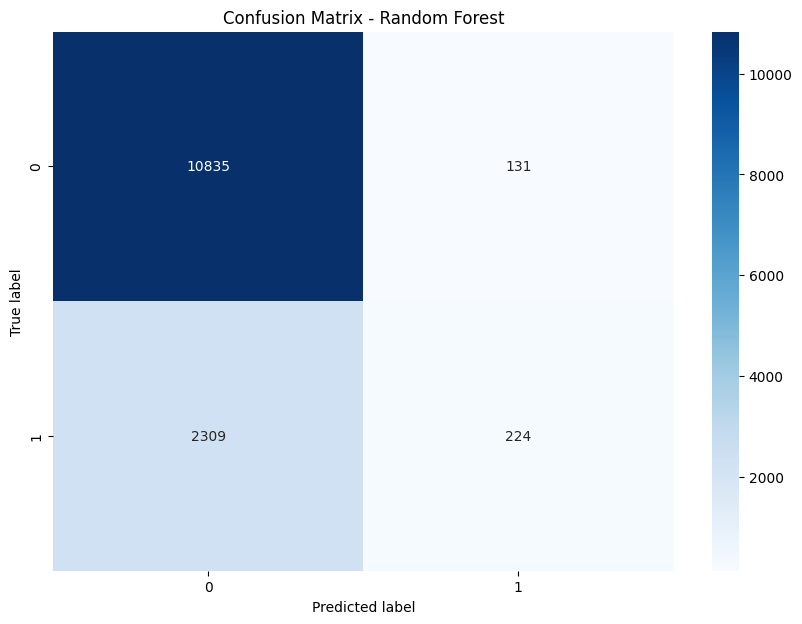

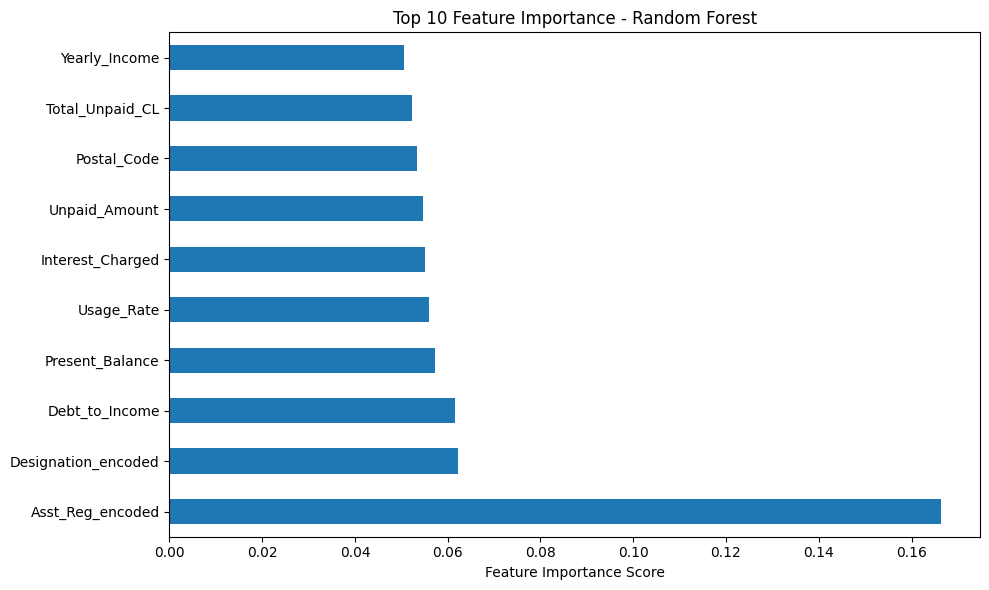

In [56]:
import time
from sklearn.inspection import permutation_importance
from sklearn.metrics import confusion_matrix

# Perform GridSearch for each classifier
results = {}

for name, (classifier, param_grid) in classifiers.items():
    # Start timing
    start_time = time.time()
    
    grid_search = GridSearchCV(classifier, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = grid_search.predict(X_test_scaled)
    
    # End timing
    end_time = time.time()
    runtime = end_time - start_time
    
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Compute feature importance
    if name in ['Logistic Regression', 'Decision Tree', 'Random Forest']:
        if name == 'Logistic Regression':
            importances = abs(grid_search.best_estimator_.coef_[0])
        elif name == 'Decision Tree':
            importances = grid_search.best_estimator_.feature_importances_
        else:  # Random Forest
            importances = grid_search.best_estimator_.feature_importances_
    else:  # For SVM, use permutation importance
        perm_importance = permutation_importance(grid_search.best_estimator_, X_test_scaled, y_test, n_repeats=10, random_state=42)
        importances = perm_importance.importances_mean
    
    # Store results
    results[name] = {
        'best_params': grid_search.best_params_,
        'best_score': grid_search.best_score_,
        'test_accuracy': accuracy_score(y_test, y_pred),
        'classification_report': classification_report(y_test, y_pred),
        'confusion_matrix': cm,
        'feature_importance': importances,
        'runtime': runtime
    }
    
    # Plot confusion matrix
    plot_confusion_matrix(cm, f'Confusion Matrix - {name}')
    
    # Plot feature importance
    plot_feature_importance(importances, f'Top 10 Feature Importance - {name}')



Results for Logistic Regression:
Best Parameters: {'C': 0.001, 'penalty': 'l2'}
Best Cross-Validation Score: 0.8105
Test Accuracy: 0.8122
Runtime: 1.95 seconds
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.99      0.90     10966
           1       0.49      0.02      0.04      2533

    accuracy                           0.81     13499
   macro avg       0.65      0.51      0.47     13499
weighted avg       0.75      0.81      0.74     13499


Top 5 Most Important Features:
Asst_Reg_encoded          0.436327
Gross_Collection          0.282641
Debt_to_Income            0.172694
File_Status_fully paid    0.139858
File_Status_whole         0.139858
dtype: float64

Results for Decision Tree:
Best Parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Cross-Validation Score: 0.8122
Test Accuracy: 0.8129
Runtime: 9.75 seconds
Classification Report:
              precision    recall  f1-score   support



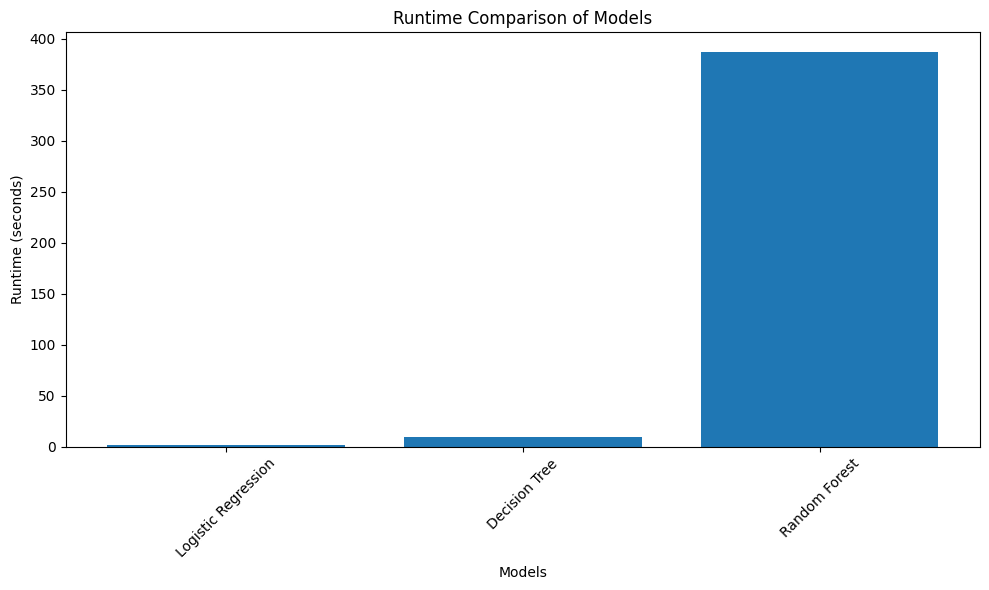

In [57]:
# Print results
for name, result in results.items():
    print(f"\nResults for {name}:")
    print(f"Best Parameters: {result['best_params']}")
    print(f"Best Cross-Validation Score: {result['best_score']:.4f}")
    print(f"Test Accuracy: {result['test_accuracy']:.4f}")
    print(f"Runtime: {result['runtime']:.2f} seconds")
    print("Classification Report:")
    print(result['classification_report'])
    print("\nTop 5 Most Important Features:")
    feat_importances = pd.Series(result['feature_importance'], index=X.columns)
    print(feat_importances.nlargest(5))

# Find the best overall model
best_model = max(results, key=lambda x: results[x]['test_accuracy'])
print(f"\nBest overall model: {best_model}")
print(f"Best overall test accuracy: {results[best_model]['test_accuracy']:.4f}")
print(f"Runtime for best model: {results[best_model]['runtime']:.2f} seconds")

# Plot runtime comparison
runtimes = [result['runtime'] for result in results.values()]
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), runtimes)
plt.title('Runtime Comparison of Models')
plt.xlabel('Models')
plt.ylabel('Runtime (seconds)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()